In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import gzip
import pickle
import matplotlib.pyplot as plt

['mnist.pkl.gz']


In [2]:
from sklearn.datasets import make_moons, make_blobs, make_classification, make_circles 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
def plot_boundary(X, y, clf, h=.02):
    #参数解释：
    #X, y：数据的坐标（二维）和label
    #h: 网格间距

    unique_lables = set(y)

    # 选择绘制颜色
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_lables)))

    #绘制网格 [x_min, x_max]x[y_min, y_max]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #得到每个网格点的分类
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 绘制网格点图
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # 绘制训练集X
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral,
                edgecolor='k', s=80)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

# Step1: 用线性可分的数据集分类

In [4]:
x_blob, y_blob = make_blobs(300, centers=3, random_state=3)

In [5]:
print(x_blob[:2],y_blob[:2])

[[6.96905011 6.3449164 ]
 [8.8664807  6.56420556]] [2 2]


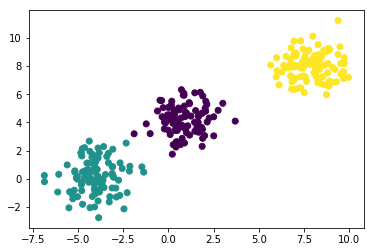

In [6]:
plt.scatter(x_blob[:,0], x_blob[:,1], c=y_blob)

1. SVM线性分类

1.0


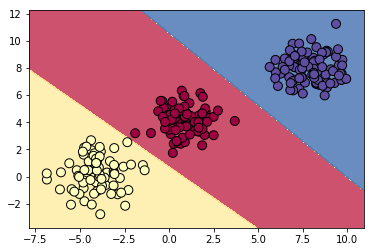

In [7]:
X_train,X_test,y_train,y_test = train_test_split(x_blob,y_blob,test_size=1/5, random_state=10)

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train,y_train)
score = svc_linear.score(X_test,y_test)
print(score)
plot_boundary(X_train, y_train, svc_linear)

2. SVM高斯核函数分类



/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0


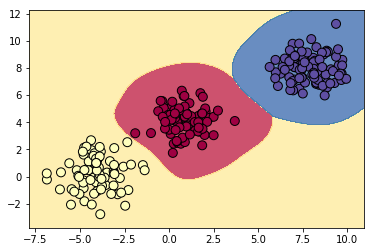

In [8]:
X_train,X_test,y_train,y_test = train_test_split(x_blob,y_blob,test_size=1/5, random_state=10)

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train,y_train)
score = svc_rbf.score(X_test,y_test)
print(score)
plot_boundary(X_train, y_train, svc_rbf)

3. kNN分类

1.0


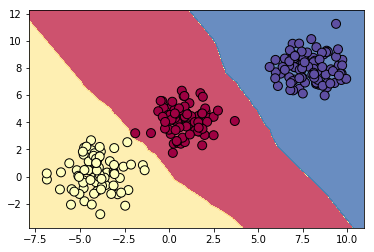

In [9]:
X_train,X_test,y_train,y_test = train_test_split(x_blob,y_blob,test_size=1/5, random_state=10)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
score = knn.score(X_test,y_test)
print(score)
plot_boundary(X_train, y_train, knn)

# Step2: 用线性不可分的数据集分类

In [10]:
x_circle, y_circle = make_circles(1000, noise=0.1, random_state=300)

In [11]:
x_circle

array([[ 0.62372015,  0.37051231],
       [-0.04230065,  0.86055738],
       [-0.78628025, -0.67134989],
       ...,
       [ 0.36546913, -0.7266459 ],
       [ 1.00530175, -0.19127663],
       [-0.86452214,  0.50075793]])

In [12]:
y_circle[:5]

array([1, 1, 0, 0, 0])

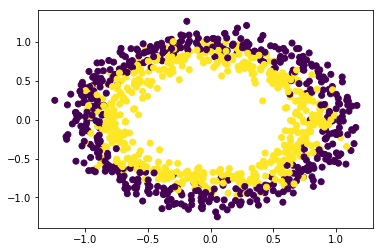

In [13]:
plt.scatter(x_circle[:,0], x_circle[:,1], c=y_circle)

0.465


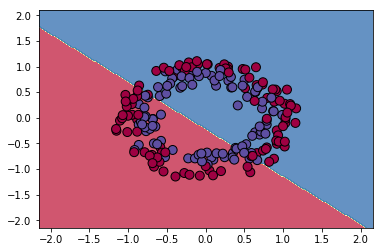

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x_circle,y_circle,test_size=1/5, random_state=300)

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train,y_train)
score = svc_linear.score(X_test,y_test)
print(score)
plot_boundary(X_test, y_test, svc_linear)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.875


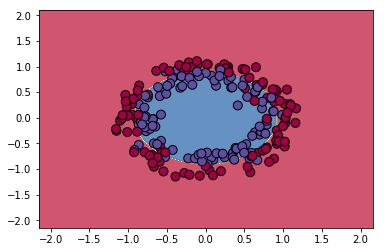

In [15]:
X_train,X_test,y_train,y_test = train_test_split(x_circle,y_circle,test_size=1/5, random_state=300)
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train,y_train)
score = svc_rbf.score(X_test,y_test)
print(score)
plot_boundary(X_test, y_test, svc_rbf)

0.85


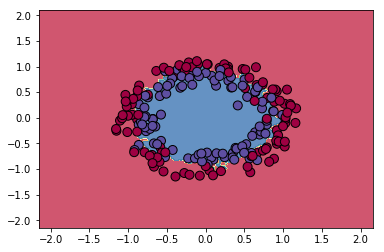

In [16]:
X_train,X_test,y_train,y_test = train_test_split(x_circle,y_circle,test_size=1/5, random_state=300)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
score = knn.score(X_test,y_test)
print(score)
plot_boundary(X_test, y_test, knn)

# Step3: 手写数字识别

1. Data Processing

In [17]:
with gzip.open('../input/mnist.pkl.gz') as f:
    train_data, valid_data, test_data = pickle.load(f, encoding='bytes')
print(train_data[0].shape)
print(train_data[1].shape)

(50000, 784)
(50000,)


In [18]:
def plot(arr_784, label):
    arr_28 = arr_784.reshape(-1,28)
    plt.imshow(arr_28, cmap=plt.cm.Greys)
    plt.title(label)
    plt.show()

In [22]:
np.random.seed(0)
train_idx = np.random.choice(len(train_data[0]),8000)
valid_idx = np.random.choice(len(valid_data[0]),1000)
test_idx = np.random.choice(len(test_data[0]),1000)

train_sample = train_data[0][train_idx]
train_label = train_data[1][train_idx]

valid_sample = valid_data[0][valid_idx]
valid_label = valid_data[1][valid_idx]

test_sample = test_data[0][test_idx]
test_label = test_data[1][test_idx]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[4 1 7 ... 8 6 0]


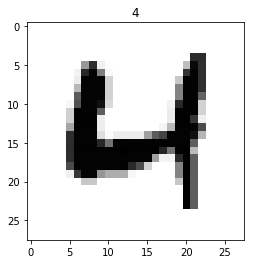

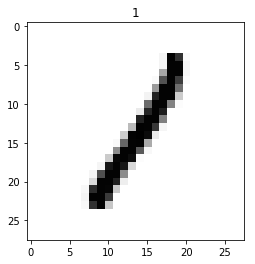

In [23]:
print(train_sample)
print(train_label)
for i,v in enumerate(train_sample[:2]):
    plot(v, train_label[i])

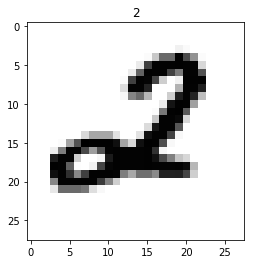

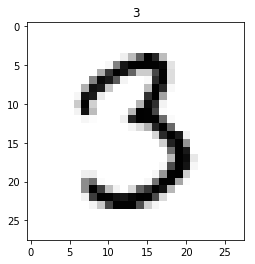

In [25]:
for i,v in enumerate(valid_sample[:2]):
    plot(v, valid_label[i])

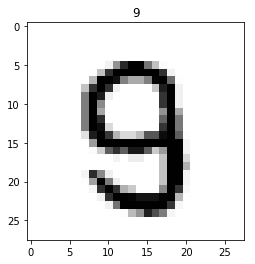

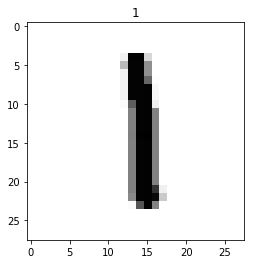

In [26]:
for i,v in enumerate(test_sample[:2]):
    plot(v, test_label[i])

2. Modeling

In [ ]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(train_sample, train_label)
score = svc_linear.score(test_sample, test_label)
score

In [29]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(train_sample, train_label)
score = svc_rbf.score(test_sample, test_label)
score

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.924

In [30]:
knn = KNeighborsClassifier()
knn.fit(train_sample, train_label)
score = knn.score(test_sample, test_label)
score

0.934

3. 模型调参

In [31]:
from sklearn.model_selection import validation_curve

Returns
-------
train_scores : array, shape (n_ticks, n_cv_folds)
    Scores on training sets.

test_scores : array, shape (n_ticks, n_cv_folds)
    Scores on test set.

kNN调参
调节参数k

In [46]:
k_list = [1, 5, 10, 20, 50]
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), valid_sample, valid_label, 'n_neighbors', k_list, cv=5)

In [47]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.93207547, 0.91864831, 0.9025    , 0.92384519, 0.90807453],
       [0.89937107, 0.88485607, 0.88625   , 0.89013733, 0.88944099],
       [0.87169811, 0.85106383, 0.86      , 0.85642946, 0.85962733],
       [0.79119497, 0.75093867, 0.7875    , 0.78651685, 0.78012422]])

In [48]:
valid_scores

array([[0.86829268, 0.91044776, 0.9       , 0.84924623, 0.9025641 ],
       [0.82926829, 0.88557214, 0.91      , 0.85427136, 0.88205128],
       [0.83414634, 0.89552239, 0.89      , 0.84422111, 0.9025641 ],
       [0.80487805, 0.88557214, 0.815     , 0.8241206 , 0.89230769],
       [0.70243902, 0.82587065, 0.755     , 0.75879397, 0.77948718]])

In [49]:
train_scores = np.mean(train_scores, axis=1)
valid_scores = np.mean(valid_scores, axis=1)

Text(0,0.5,'accuracy')

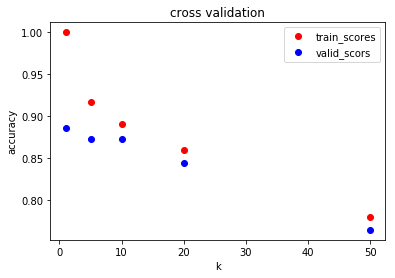

In [50]:
plt.plot(k_list, train_scores, 'ro', label='train_scores')
plt.plot(k_list, valid_scores, 'bo', label='valid_scors')
plt.legend() # 添加图例

plt.title('cross validation') # 添加标题
plt.xlabel('k') # 添加x轴描述
plt.ylabel('accuracy') # 添加y轴描述

svm高斯核调参

- C：误差项的惩罚系数
- gamma: 高斯核的衰减速率

In [52]:
c_list = [1, 10, 100, 200, 300, 500]
train_scores, valid_scores = validation_curve(SVC(kernel='rbf'), valid_sample, valid_label, 'C', c_list, cv=5)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
train_scores = np.mean(train_scores, axis=1)
valid_scores = np.mean(valid_scores, axis=1)

Text(0,0.5,'accuracy')

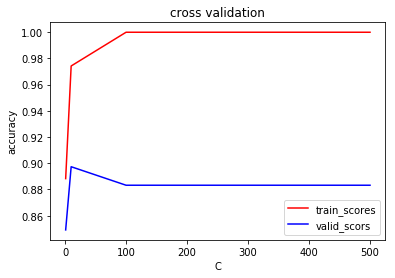

In [56]:
plt.plot(c_list, train_scores, 'r-', label='train_scores')
plt.plot(c_list, valid_scores, 'b-', label='valid_scors')
plt.legend() # 添加图例

plt.title('cross validation') # 添加标题
plt.xlabel('C') # 添加x轴描述
plt.ylabel('accuracy') # 添加y轴描述

再调gamma

Text(0,0.5,'accuracy')

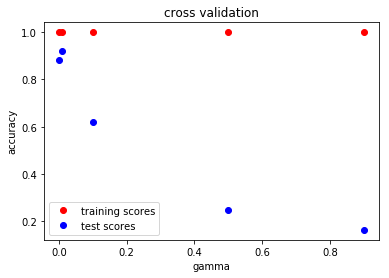

In [60]:
svc_rbf = SVC(kernel='rbf', C=100)
gamma_list = [0.001, 0.01, 0.1, 0.5, 0.9]

train_scores, valid_scores = validation_curve(svc_rbf, valid_sample, 
                               valid_label, 'gamma', gamma_list, cv=5)


train_scores = np.mean(train_scores, axis=1)
valid_scores = np.mean(valid_scores, axis=1)

# 画出图像
ax = plt.subplot()
ax.plot(gamma_list, train_scores, 'ro', label='training scores')
ax.plot(gamma_list, valid_scores, 'bo', label='test scores')
ax.legend() # 添加图例

plt.title('cross validation') # 添加标题
ax.set_xlabel('gamma') # 添加x轴描述
ax.set_ylabel('accuracy') # 添加y轴描述

再精调

Text(0,0.5,'accuracy')

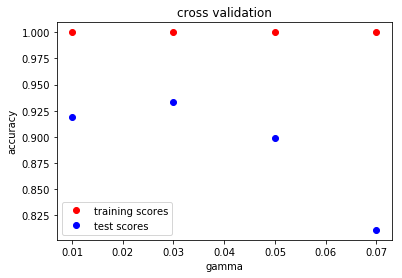

In [59]:

svc_rbf = SVC(kernel='rbf', C=100)
gamma_list = [0.01, 0.03, 0.05, 0.07]

train_scores, valid_scores = validation_curve(svc_rbf, valid_sample, 
                               valid_label, 'gamma', gamma_list, cv=5)

train_scores = np.mean(train_scores, axis=1)
valid_scores = np.mean(valid_scores, axis=1)

# 画出图像
ax = plt.subplot()
ax.plot(gamma_list, train_scores, 'ro', label='training scores')
ax.plot(gamma_list, valid_scores, 'bo', label='test scores')
ax.legend() # 添加图例

plt.title('cross validation') # 添加标题
ax.set_xlabel('gamma') # 添加x轴描述
ax.set_ylabel('accuracy') # 添加y轴描述

得到最佳参数组合： C = 100， gamma = 0.03

In [ ]:
svc_model = SVC(kernel='rbf',C=100, gamma=0.03)
svc_model.fit(train_data[0], train_data[1])
score = svc_model.score(test_data[0], test_data[1])
score